# Zomato_Data_Analysis

Understanding customer preferences and restaurant trends is important for making informed business decisions in food industry. In this article, we will analyze Zomato’s restaurant dataset using Python to find meaningful insights. We aim to answer questions such as:

# Import necessary python libraries


In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Creating the Dataframe

df = pd.read_csv("Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [14]:
df.shape

(148, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


# Data Cleaning and Pre-processing

In [10]:
# Before moving further we need to clean and pre-process the data 

# we are going to convert the rate column into a float by removing the denominator character

def handlerate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)

df["rate"]=df["rate"].apply(handlerate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [11]:
# Getting the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [12]:
# checking for the null values 
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Text(0.5, 0, 'Types of Restaurant')

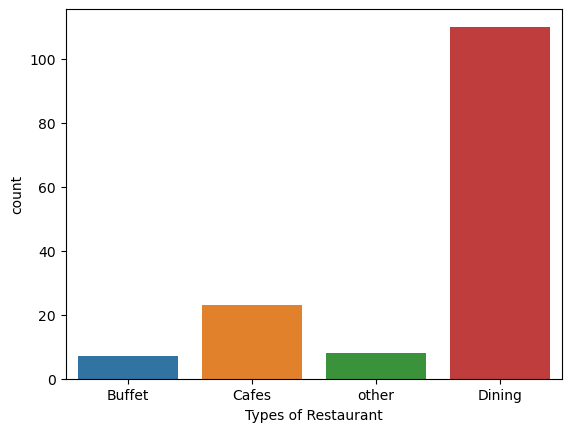

In [15]:
# Now Exploring the restaurant Types

sns.countplot(x="listed_in(type)",data=df)
plt.xlabel("Types of Restaurant")

Conclusion: The majority of the restaurants falls in the Dining Category

In [19]:
df["listed_in(type)"].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

In [22]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

Text(0, 0.5, 'votes')

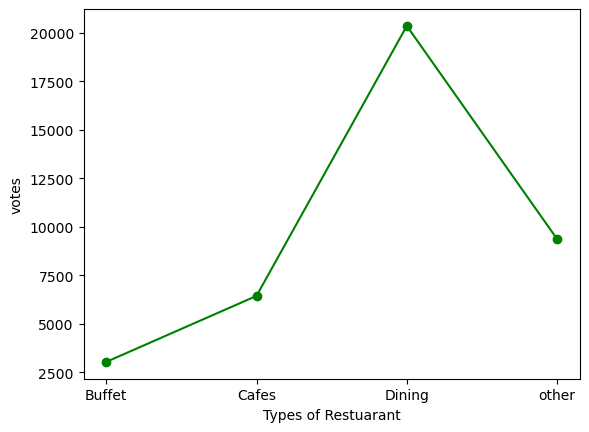

In [25]:
# Votes by Restaurants types 

# Here we get count of vote for each category

grouped_data = df.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes":grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Types of Restuarant")
plt.ylabel("votes")

Conclusion:- dining restuarants are preferred by large number of individuals

# Identify the most Rated Restuarant

. Find the Restuarant with highest number of votes

In [27]:
max_votes = df["votes"].max()
restuarant_with_max_votes = df.loc[df["votes"]==max_votes,"name"]
print("Restuarant(s) with maximum votes")
print(restuarant_with_max_votes)

Restuarant(s) with maximum votes
38    Empire Restaurant
Name: name, dtype: object


In [29]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

# Online Order Availability

* Exploaing online_order column to see how many restuarant accept online order


<Axes: xlabel='online_order', ylabel='count'>

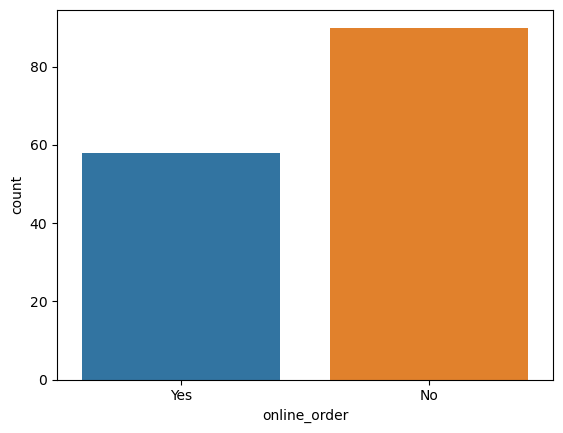

In [32]:
sns.countplot(x=df["online_order"])

* This suggests that majority of the restuarants does not accept online orders

# Analyze Rating

* Checking the distribution of the rating from the rate column

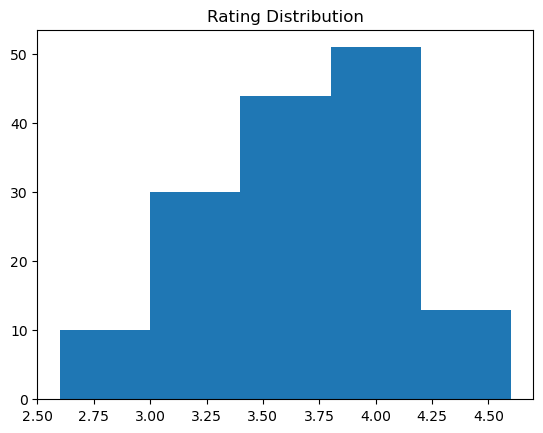

In [34]:
plt.hist(df["rate"],bins=5)
plt.title("Rating Distribution")
plt.show()

Conclusion: The Majority of the Restuarant recieved ratings ranging from 3.5 to 4

# Approximate costs for couples

* Analayze the approx_cost(for two_couples) columns for preferred price range

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

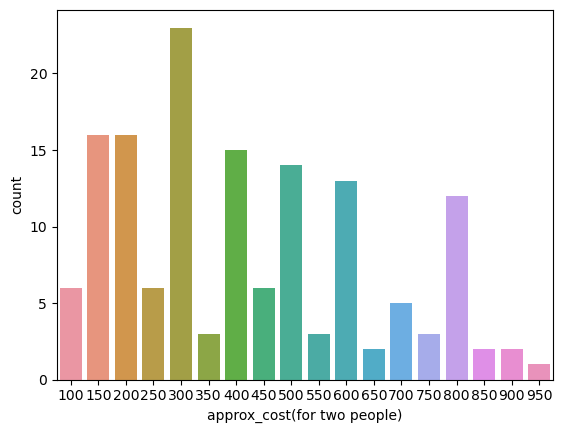

In [36]:
sns.countplot(x = "approx_cost(for two people)",data=df)

Conclusion: The majority of the people prefer restuarant with an approximation cost of 300 ruppess

# Rating comparison online Vs offline order

. Comparing Ratings between restuarants that accepts online orders and those that don't

In [40]:
df["online_order"].value_counts()

online_order
No     90
Yes    58
Name: count, dtype: int64

<Axes: xlabel='online_order', ylabel='rate'>

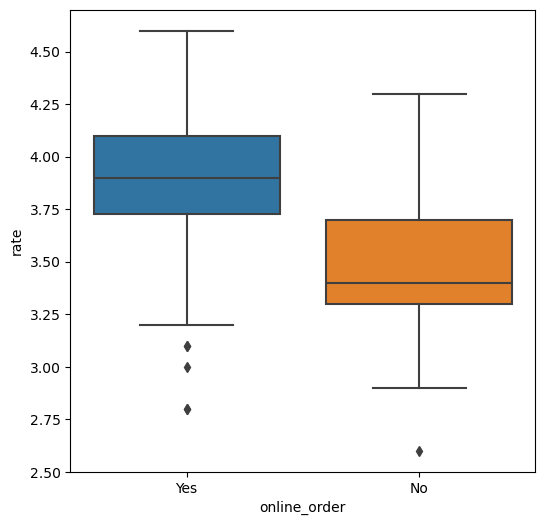

In [43]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate",data=df)

* offline recieved lower rating in comparision to online orders which obtained excellent ratings

# Order Mode preferences by Restuarant Type

* Find the relation between order mode (online_order) and restuarant type (listed_in(type))

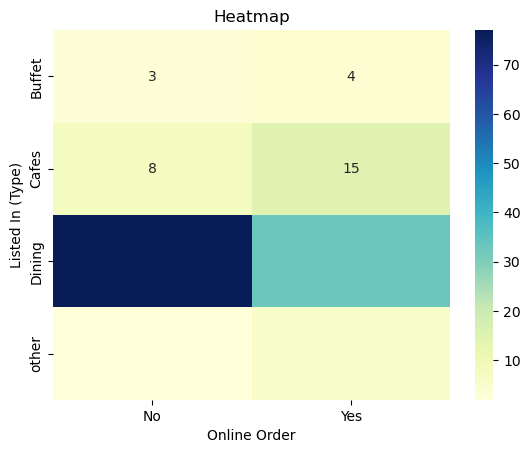

In [46]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

With this we can say that dining restaurants primarily accept offline orders whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.